# Convolutional Neural Network Model (without 10-Fold-Cross-Validation)

This file does not contain 10-fold-cross-validation and parameter tuning in order to demonstrate the final model faster.   
**For validation and parameter tuning version please see CNN-Training.ipynb**

## Import Pakages

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from imutils import build_montages
from keras import backend as K
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.optimizers import SGD, Adadelta
from sklearn.metrics import classification_report
import matplotlib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
import time
from keras.utils import plot_model
from keras.models import load_model

## Load and Process Data

In [0]:
# load data
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()
# rashape data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [0]:
# scale data to the range of [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# one-hot encode the training and testing labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# initialize the label names
labelNames = ["t-Shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

## Specify Prameters

In [0]:
# number of epoches
NUM_EPOCHS = 30
# learning rate
LEARN_RATE = 0.1
# batch size
BATCH_SIZE = 200

# initialize the optimizer and model
adadelta=Adadelta()
sgd = SGD(lr=LEARN_RATE, momentum=0.9, decay=LEARN_RATE / NUM_EPOCHS)

## Construct Model

In [0]:
class CNN:
  def build(width=28, height=28, depth=1, optimizer=adadelta, dropout_rate = 0.25, BN = False):
    chanDim = -1
    input_shape = (height, width, depth)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    if (BN is True):
      model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    if (BN is True):
      model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

## Compile Model

In [0]:
# final model used
model = CNN.build(optimizer = adadelta, dropout_rate = 0.6, BN = False)

## Train Model

In [15]:
# training
start = time.time()

H = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

end = time.time()

running_time = round(end - start, 2)
print("time: ", running_time)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 154us/step - loss: 0.6639 - acc: 0.7635 - val_loss: 0.4091 - val_acc: 0.8488
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.4296 - acc: 0.8457 - val_loss: 0.3401 - val_acc: 0.8759
Epoch 3/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.3810 - acc: 0.8640 - val_loss: 0.3201 - val_acc: 0.8832
Epoch 4/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.3543 - acc: 0.8734 - val_loss: 0.2915 - val_acc: 0.8942
Epoch 5/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.3293 - acc: 0.8818 - val_loss: 0.2844 - val_acc: 0.8976
Epoch 6/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.3127 - acc: 0.8877 - val_loss: 0.2651 - val_acc: 0.9010
Epoch 7/30
60000/60000 [==============================] - 4s 70us/step - loss: 

## Genrate Result

In [0]:
# plot model structure
plot_model(model, to_file='model.png')

0.5710480213165283
              precision    recall  f1-score   support

     t-Shirt       0.87      0.90      0.88      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.87      0.91      0.89      1000
       dress       0.92      0.95      0.93      1000
        coat       0.90      0.87      0.89      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.81      0.77      0.79      1000
     sneaker       0.96      0.98      0.97      1000
         bag       0.99      0.98      0.98      1000
  ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



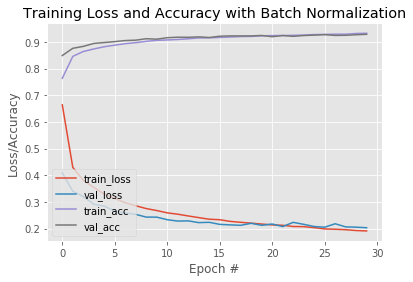

In [17]:
# make predictions on the test set

start = time.time()

preds = model.predict(x_test)

end = time.time()

running_time = end - start
print(running_time)

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
                            target_names=labelNames))

N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy with Batch Normalization")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")


In [0]:
# save the model
model.save('CNN.h5')

In [0]:
# returns a compiled model
# identical to the previous one
model = load_model('CNN.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
